In [1]:
import os
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# config
DataSplatoon = "/home/tidal/ML_Data/Splatoon/input"
Output = "/home/tidal/ML_Data/Splatoon/output"

# preprocessing

In [3]:
train = pd.read_csv(DataSplatoon + '/trainMod.csv')
test = pd.read_csv(DataSplatoon + '/testMod.csv')

In [5]:
train

,id,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,...,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y,yyyymmdd,time,dateDelta,hour
0,1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,...,NaN,68.0,sharp_neo,NaN,31.0,1,2019-10-15,20:00:00+00:00,78,20
1,2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,...,NaN,168.0,sputtery_clear,NaN,151.0,0,2019-12-14,04:00:00+00:00,18,4
2,3,2019-12-25T14:00:00+00:00,5.0.1,gachi,standard,hoko,ama,nzap89,a-,114,...,a-,160.0,dualsweeper_custom,a,126.0,0,2019-12-25,14:00:00+00:00,7,14
3,4,2019-11-11T14:00:00+00:00,5.0.1,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,...,NaN,194.0,hotblaster_custom,NaN,391.0,0,2019-11-11,14:00:00+00:00,51,14
4,5,2019-12-14T06:00:00+00:00,5.0.1,gachi,standard,hoko,chozame,bold_7,x,299,...,x,246.0,wakaba,x,160.0,1,2019-12-14,06:00:00+00:00,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66120,66121,2019-10-11T10:00:00+00:00,5.0.1,gachi,standard,area,devon,hokusai_becchu,a,66,...,a,38.0,wakaba,a+,283.0,1,2019-10-11,10:00:00+00:00,82,10
66121,66122,2019-12-04T00:00:00+00:00,5.0.1,gachi,standard,asari,otoro,hokusai_becchu,s+,204,...,s+,188.0,nzap89,s+,170.0,1,2019-12-04,00:00:00+00:00,28,0
66122,66123,2019-10-22T00:00:00+00:00,5.0.1,gachi,standard,hoko,bbass,prime_collabo,a+,116,...,a+,191.0,hissen_hue,a+,139.0,1,2019-10-22,00:00:00+00:00,71,0
66123,66124,2019-12-11T00:00:00+00:00,5.0.1,gachi,standard,area,fujitsubo,heroroller_replica,s+,210,...,s+,223.0,sharp_neo,s+,194.0,0,2019-12-11,00:00:00+00:00,21,0


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
#ラベルエンコード(文字列→数値)
def Label_encode(train, test, feature_name):
    for f in feature_name:
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))
    
    return train, test

In [14]:
def FillnaAndInsertIsnan(DataFrame, ColsAndFillVals):
    for (col, val) in ColsAndFillVals:
        IsnanSeries = DataFrame[col].isnull()
        DataFrame[col] = DataFrame[col].fillna(val)
        DataFrame.insert(len(DataFrame.columns), col + "_isnan", IsnanSeries)
    return DataFrame

In [15]:
#game-verは5.0.1しかないので削除
train = train.drop("game-ver", axis=1)
test = test.drop("game-ver", axis=1)
#時間についての一部列削除
train = train.drop(["period","yyyymmdd","time"], axis=1)
test = test.drop(["period","yyyymmdd","time"], axis=1)
#id列削除
train = train.drop("id", axis=1)
test = test.drop("id", axis=1)

In [16]:
mean_A4level = train['A4-level'].mean()
mean_B3level = train['B3-level'].mean()
mean_B4level = train['B4-level'].mean()
train = FillnaAndInsertIsnan(train, 
                             [('A1-rank','na'), ('A2-rank','na'), ('A3-rank','na'), ('A4-rank','na'), ('A4-weapon','na'), 
                              ('A4-level',mean_A4level), ('B1-rank','na'), ('B2-rank','na'), ('B3-rank','na'), ('B4-rank','na'),
                              ('B3-weapon','na'), ('B3-level',mean_B3level), ('B4-weapon','na'), ('B4-level',mean_B4level)])
test = FillnaAndInsertIsnan(test, 
                             [('A1-rank','na'), ('A2-rank','na'), ('A3-rank','na'), ('A4-rank','na'), ('A4-weapon','na'), 
                              ('A4-level',mean_A4level), ('B1-rank','na'), ('B2-rank','na'), ('B3-rank','na'), ('B4-rank','na'),
                              ('B3-weapon','na'), ('B3-level',mean_B3level), ('B4-weapon','na'), ('B4-level',mean_B4level)])

In [17]:
train

,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,...,A4-weapon_isnan,A4-level_isnan,B1-rank_isnan,B2-rank_isnan,B3-rank_isnan,B4-rank_isnan,B3-weapon_isnan,B3-level_isnan,B4-weapon_isnan,B4-level_isnan
0,regular,standard,nawabari,sumeshi,sshooter_becchu,na,139,soytuber_custom,na,118.0,...,False,False,True,True,True,True,False,False,False,False
1,regular,standard,nawabari,arowana,parashelter_sorella,na,198,jetsweeper,na,77.0,...,False,False,True,True,True,True,False,False,False,False
2,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,a,68.0,...,False,False,False,False,False,False,False,False,False,False
3,regular,standard,nawabari,engawa,bamboo14mk1,na,336,splatroller_becchu,na,131.0,...,False,False,True,True,True,True,False,False,False,False
4,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,x,97.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66120,gachi,standard,area,devon,hokusai_becchu,a,66,soytuber,a,113.0,...,False,False,False,False,False,False,False,False,False,False
66121,gachi,standard,asari,otoro,hokusai_becchu,s+,204,prime_becchu,s+,96.0,...,False,False,False,False,False,False,False,False,False,False
66122,gachi,standard,hoko,bbass,prime_collabo,a+,116,promodeler_rg,a,86.0,...,False,False,False,False,False,False,False,False,False,False
66123,gachi,standard,area,fujitsubo,heroroller_replica,s+,210,sharp_neo,s+,96.0,...,False,False,False,False,False,False,False,False,False,False


In [18]:
print(train.dropna(how='any').shape)
print(test.dropna(how='any').shape)

(66125, 45)
(28340, 44)


In [19]:
feature_name =  ['lobby-mode','lobby','mode','stage','A1-rank','A1-weapon','A2-rank','A2-weapon','A3-rank','A3-weapon','A4-rank','A4-weapon',
                 'B1-rank','B1-weapon','B2-rank','B2-weapon','B3-rank','B3-weapon','B4-rank','B4-weapon',]
train, test = Label_encode(train, test, feature_name)

In [20]:
train

,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,...,A4-weapon_isnan,A4-level_isnan,B1-rank_isnan,B2-rank_isnan,B3-rank_isnan,B4-rank_isnan,B3-weapon_isnan,B3-level_isnan,B4-weapon_isnan,B4-level_isnan
0,1,0,3,20,134,9,139,111,9,118.0,...,False,False,True,True,True,True,False,False,False,False
1,1,0,3,3,91,9,198,56,9,77.0,...,False,False,True,True,True,True,False,False,False,False
2,0,0,2,1,84,2,114,98,0,68.0,...,False,False,False,False,False,False,False,False,False,False
3,1,0,3,8,5,9,336,116,9,131.0,...,False,False,True,True,True,True,False,False,False,False
4,0,0,2,6,12,12,299,48,12,97.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66120,0,0,0,7,50,0,66,110,0,113.0,...,False,False,False,False,False,False,False,False,False,False
66121,0,0,1,18,50,11,204,93,11,96.0,...,False,False,False,False,False,False,False,False,False,False
66122,0,0,2,5,94,1,116,97,0,86.0,...,False,False,False,False,False,False,False,False,False,False
66123,0,0,0,9,42,11,210,109,11,96.0,...,False,False,False,False,False,False,False,False,False,False


In [21]:
train = train.astype({'A2-level':'int64', 'A3-level':'int64', 'A4-level':'int64',
                      'B2-level':'int64', 'B3-level':'int64', 'B4-level':'int64'})
test = test.astype({'A2-level':'int64', 'A3-level':'int64', 'A4-level':'int64',
                      'B2-level':'int64', 'B3-level':'int64', 'B4-level':'int64'})

In [22]:
X = train.drop(['y'], axis=1)
y = train['y']
X_test = test

In [23]:
X.dtypes

lobby-mode         int64
lobby              int64
mode               int64
stage              int64
A1-weapon          int64
A1-rank            int64
A1-level           int64
A2-weapon          int64
A2-rank            int64
A2-level           int64
A3-weapon          int64
A3-rank            int64
A3-level           int64
A4-weapon          int64
A4-rank            int64
A4-level           int64
B1-weapon          int64
B1-rank            int64
B1-level           int64
B2-weapon          int64
B2-rank            int64
B2-level           int64
B3-weapon          int64
B3-rank            int64
B3-level           int64
B4-weapon          int64
B4-rank            int64
B4-level           int64
dateDelta          int64
hour               int64
A1-rank_isnan       bool
A2-rank_isnan       bool
A3-rank_isnan       bool
A4-rank_isnan       bool
A4-weapon_isnan     bool
A4-level_isnan      bool
B1-rank_isnan       bool
B2-rank_isnan       bool
B3-rank_isnan       bool
B4-rank_isnan       bool


In [24]:
X_test.dtypes

lobby-mode         int64
lobby              int64
mode               int64
stage              int64
A1-weapon          int64
A1-rank            int64
A1-level           int64
A2-weapon          int64
A2-rank            int64
A2-level           int64
A3-weapon          int64
A3-rank            int64
A3-level           int64
A4-weapon          int64
A4-rank            int64
A4-level           int64
B1-weapon          int64
B1-rank            int64
B1-level           int64
B2-weapon          int64
B2-rank            int64
B2-level           int64
B3-weapon          int64
B3-rank            int64
B3-level           int64
B4-weapon          int64
B4-rank            int64
B4-level           int64
dateDelta          int64
hour               int64
A1-rank_isnan       bool
A2-rank_isnan       bool
A3-rank_isnan       bool
A4-rank_isnan       bool
A4-weapon_isnan     bool
A4-level_isnan      bool
B1-rank_isnan       bool
B2-rank_isnan       bool
B3-rank_isnan       bool
B4-rank_isnan       bool


# model

In [25]:
from sklearn import metrics
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import time
import seaborn as sns
from sklearn.svm import SVC

In [26]:
def train_model_classification(X, X_test, y, params, folds, model_type='lgb', eval_metric='auc', columns=None, X_metaval=None, 
                               plot_feature_importance=False, model=None, verbose=10000, early_stopping_rounds=200, n_estimators=50000):
    """
    A function to train a variety of classification models.
    Returns dictionary with oof predictions, test predictions, scores and, if necessary, feature importances.
    
    :params: X - training data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: X_test - test data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: y - target
    :params: folds - folds to split data
    :params: model_type - type of model to use
    :params: eval_metric - metric to use
    :params: columns - columns to use. If None - use all columns
    :params: plot_feature_importance - whether to plot feature importance of LGB
    :params: model - sklearn model, works only for "sklearn" model type
    :params: verbose - parameters for gradient boosting models
    :params: early_stopping_rounds - parameters for gradient boosting models
    :params: n_estimators - parameters for gradient boosting models
    
    """
    columns = X.columns if columns == None else columns
    X_test = X_test[columns]
    if X_metaval is not None:
        X_metaval = X_metaval[columns]
    
    # to set up scoring parameters
    metrics_dict = {'auc': {'lgb_metric_name': 'auc',
                        'catboost_metric_name': 'AUC',
                        'sklearn_scoring_function': metrics.roc_auc_score},
                    }
    
    result_dict = {}
    
    # out-of-fold predictions on train data
    oof = np.zeros((len(X), len(set(y.values))))
    
    # averaged predictions on train data
    prediction = np.zeros((len(X_test), oof.shape[1]))
    
    # list of scores on folds
    scores = []
    feature_importance = pd.DataFrame()
    
    # split and train on folds
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print(f'Fold {fold_n + 1} started at {time.ctime()}')
        if type(X) == np.ndarray:
            X_train, X_valid = X[columns][train_index], X[columns][valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
        if model_type == 'lgb':
            model = lgb.LGBMClassifier(**params, n_estimators=n_estimators, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
                    verbose=verbose, early_stopping_rounds=early_stopping_rounds)
            
            y_pred_valid = model.predict_proba(X_valid, num_iteration=model.best_iteration_)
            y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=n_estimators, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=verbose, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict_proba(X_valid)#.reshape(-1,)
            #print(len(y_pred_valid))
            #print(len(y_valid))
            #print(y_pred_valid)
            #print(y_valid)
            score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid[:, 1])
            print(f'Fold {fold_n + 1}. {eval_metric}: {score:.4f}.')
            print('')
            
            y_pred = model.predict_proba(X_test)
        
        if model_type == 'cat':
            model = CatBoostClassifier(iterations=n_estimators, eval_metric=metrics_dict[eval_metric]['catboost_metric_name'], **params,
                                      loss_function=metrics_dict[eval_metric]['catboost_metric_name'])
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        #print(oof.shape)
        #print(oof[valid_index])
        oof[valid_index] = y_pred_valid
        scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid[:, 1]))#0 or 1の問題にしか対応してない
        
        #print(y_pred.shape)
        prediction += y_pred
        
        if model_type == 'lgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= folds.n_splits
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    result_dict['oof'] = oof
    result_dict['prediction'] = prediction
    result_dict['scores'] = scores
    
    if model_type == 'lgb':
        if plot_feature_importance:
            feature_importance["importance"] /= folds.n_splits
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
            
            result_dict['feature_importance'] = feature_importance
        
    return result_dict


# run

In [27]:
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold

Fold 1 started at Sun Aug 30 00:17:45 2020
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[373]	training's auc: 0.698969	training's binary_logloss: 0.668774	valid_1's auc: 0.543878	valid_1's binary_logloss: 0.687883
Fold 2 started at Sun Aug 30 00:17:48 2020
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[634]	training's auc: 0.750348	training's binary_logloss: 0.656696	valid_1's auc: 0.548909	valid_1's binary_logloss: 0.68725
Fold 3 started at Sun Aug 30 00:17:51 2020
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[744]	training's auc: 0.764461	training's binary_logloss: 0.652344	valid_1's auc: 0.547438	valid_1's binary_logloss: 0.688415
Fold 4 started at Sun Aug 30 00:17:54 2020
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[549]	training's auc: 0.734963	training's binary_logloss: 0

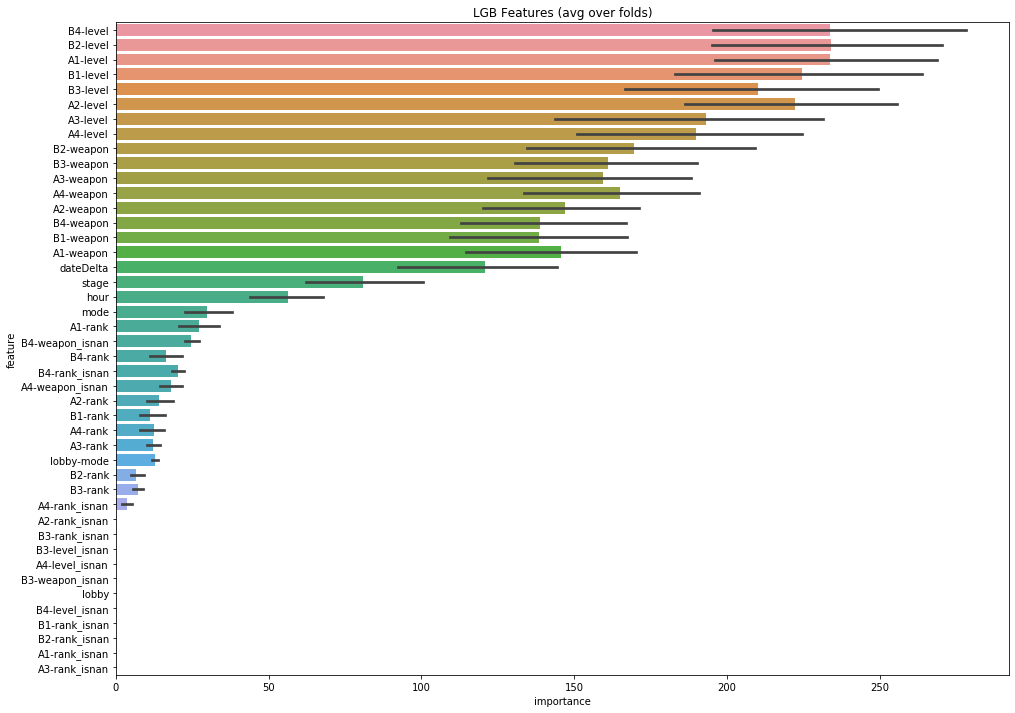

In [28]:
%%time

#交差検証
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=11)
m_type = "lgb"

params = {"boosting_type": "gbdt",
          "learning_rate": 0.01,
          #'max_depth': 7,
          #'num_leaves': 31,
          "subsample_freq": 1,
          "subsample": 0.9,
          #'reg_alpha': 0,
          #'reg_lambda': 0,
         }

#lgb(決定木)で学習実行
result_dict = train_model_classification(X=X, X_test=X_test, y=y, params=params, folds=folds, model_type=m_type, eval_metric='auc',
                                         plot_feature_importance=True, verbose=1000, early_stopping_rounds=200, n_estimators=10000)


csv_file_path = Output + 'test/sub_test_' + m_type + '.csv'
pred = result_dict["prediction"][:,1] + 0.5
for i in range(len(pred)):
    tmp = int(result_dict["prediction"][i,1] + 0.5)
    pred[i] = tmp
pred = pred.astype(np.int64)
sub_TD = pd.DataFrame({"id": range(len(result_dict["prediction"][:,1])), "y": pred })
sub_TD.to_csv(Output + '/submission.csv', index=False)
#sub_TD.to_csv(Output + '/bk/' + m_type + '.csv', index=False)


In [87]:
pred = result_dict["prediction"][:,1] + 0.5
for i in range(len(pred)):
    tmp = int(pred[i])
    pred[i] = tmp
    

In [95]:
pred

array([1.0034056 , 0.98412968, 0.99938114, ..., 1.01432121, 1.01171085,
       0.97789394])

In [86]:
np.zeros(3)

array([0., 0., 0.])

In [92]:
pred = pred.astype(np.int64)

In [93]:
pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
pred = result_dict["prediction"][:,1] + 0.5
for i in range(len(pred)):
    tmp = int(result_dict["prediction"][:,1] + 0.5)
    pred[i] = tmp
pred = pred.astype(np.int64)
sub_TD = pd.DataFrame({"id": range(len(result_dict["prediction"][:,1])), "y": pred })
sub_TD.to_csv(Output + '/submission.csv', index=False)